In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [51]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [53]:
iris.drop('Id', axis=1, inplace=True)

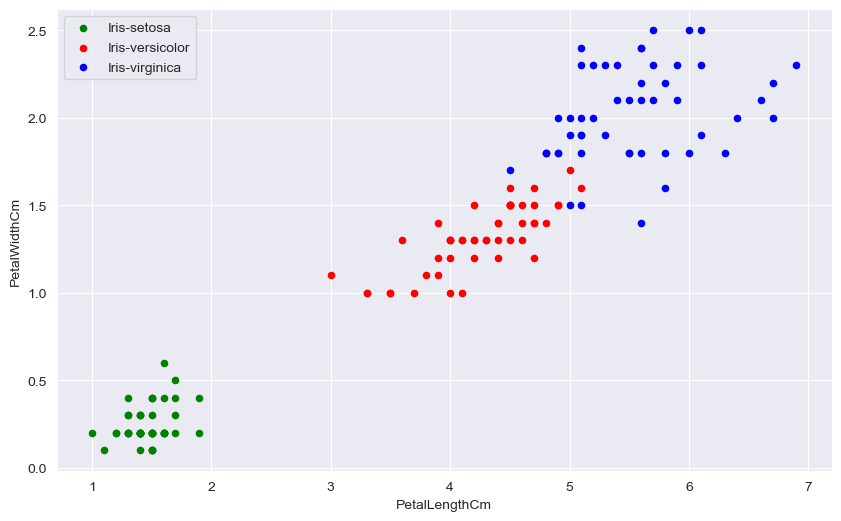

In [54]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Iris-setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Iris-versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Iris-virginica', ax=fig)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

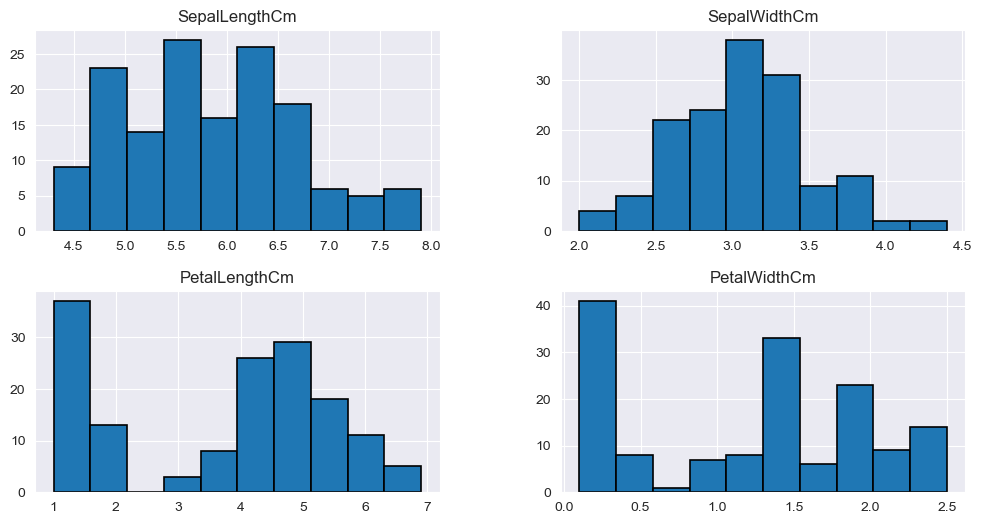

In [55]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

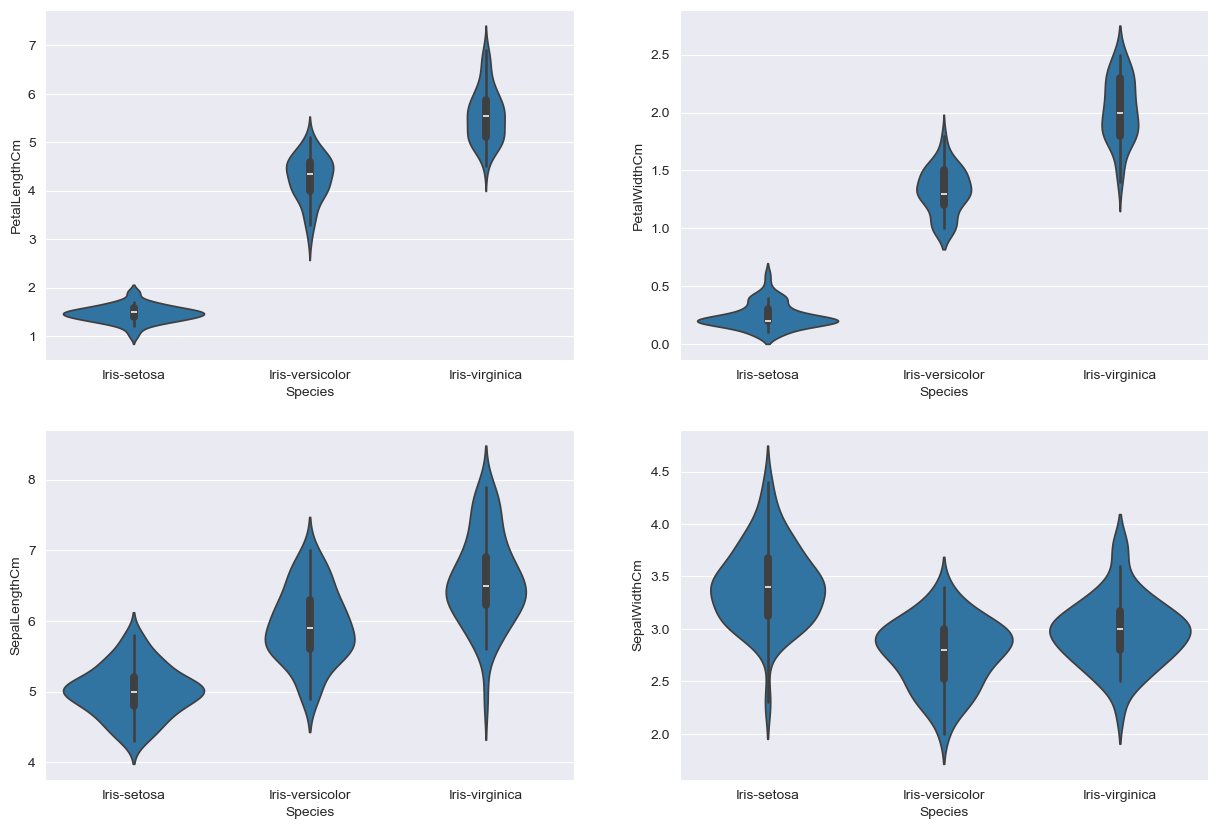

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

In [57]:
iris.shape

(150, 5)

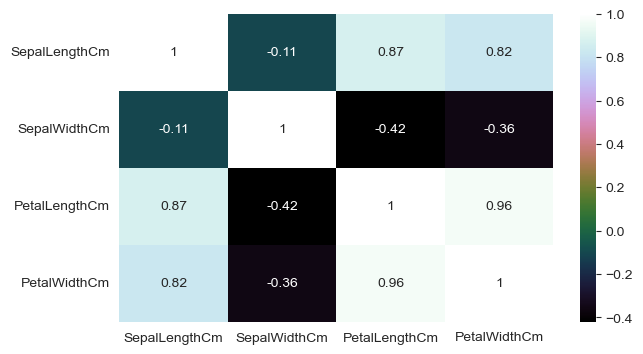

In [58]:
iris_numeric = iris.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(7,4))
sns.heatmap(iris_numeric.corr(), annot=True, cmap='cubehelix')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop('Species', axis=1), iris['Species'], test_size=0.3)

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [60]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [61]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333


In [62]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333


([<matplotlib.axis.XTick at 0xe85e940>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

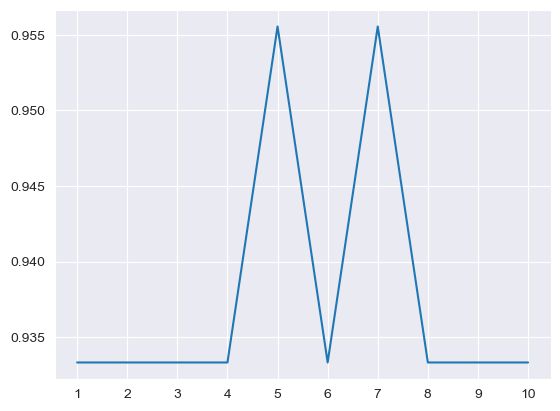

In [63]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    a = pd.concat([a, pd.Series(accuracy_score(prediction, y_test))], ignore_index=True)
plt.plot(a_index, a)
plt.xticks(x)

In [64]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [65]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(petal.drop('Species', axis=1), petal['Species'], test_size=0.3)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(sepal.drop('Species', axis=1), sepal['Species'], test_size=0.3)

In [66]:
lrp_model = LogisticRegression(max_iter=1000)
lrp_model.fit(Xp_train, yp_train)
yp_pred = lrp_model.predict(Xp_test)
print(accuracy_score(yp_test, yp_pred))

lrs_model = LogisticRegression(max_iter=1000)
lrs_model.fit(Xs_train, ys_train)
ys_pred = lrs_model.predict(Xs_test)
print(accuracy_score(ys_test, ys_pred))

0.9777777777777777
0.7333333333333333


In [67]:
svm_model = svm.SVC()
svm_model.fit(Xp_train, yp_train)
yp_pred = svm_model.predict(Xp_test)
print(accuracy_score(yp_test, yp_pred))

svm_model = svm.SVC()
svm_model.fit(Xs_train, ys_train)
ys_pred = svm_model.predict(Xs_test)
print(accuracy_score(ys_test, ys_pred))

0.9777777777777777
0.6888888888888889


In [68]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(Xp_train, yp_train)
yp_pred = knn_model.predict(Xp_test)
print(accuracy_score(yp_test, yp_pred))

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(Xs_train, ys_train)
ys_pred = knn_model.predict(Xs_test)
print(accuracy_score(ys_test, ys_pred))

0.9777777777777777
0.7777777777777778


In [69]:
dt_model = DecisionTreeClassifier()
dt_model.fit(Xp_train, yp_train)
yp_pred = dt_model.predict(Xp_test)
print(accuracy_score(yp_test, yp_pred))

dt_model = DecisionTreeClassifier()
dt_model.fit(Xs_train, ys_train)
ys_pred = dt_model.predict(Xs_test)
print(accuracy_score(ys_test, ys_pred))

0.9555555555555556
0.7333333333333333
